In [1]:
from qiskit import *
from qiskit.circuit.library import *

from qiskit.tools.visualization import *
from qiskit.providers.aer import *
from qiskit.providers.aer.noise import *


import matplotlib.pyplot as plt
import numpy as np
pi = np.pi


import pandas as pd
import statistics 
from statsmodels.stats.weightstats import DescrStatsW

In [2]:
# The grover oracle which contains the phase oracle and the diffuser operators
def grover_oracle(n,name = 'G' ): #
    qc = QuantumCircuit(n, name=name) #
    # giving them n solutions
    qc.mct(list(range(n-1)), n-1)
    
    for qb in range(n-1): #first layer of Hadamards in diffuser
        qc.h(qb)
   
    for i in range(n-1):
        qc.x(i)
        
    qc.mct(list(range(n-1)), n-1)
    
    for i in range(n-1):
        qc.x(i)
    
    for qb in range(n-1): #second layer of Hadamards in diffuser
        qc.h(qb)
    
    return qc


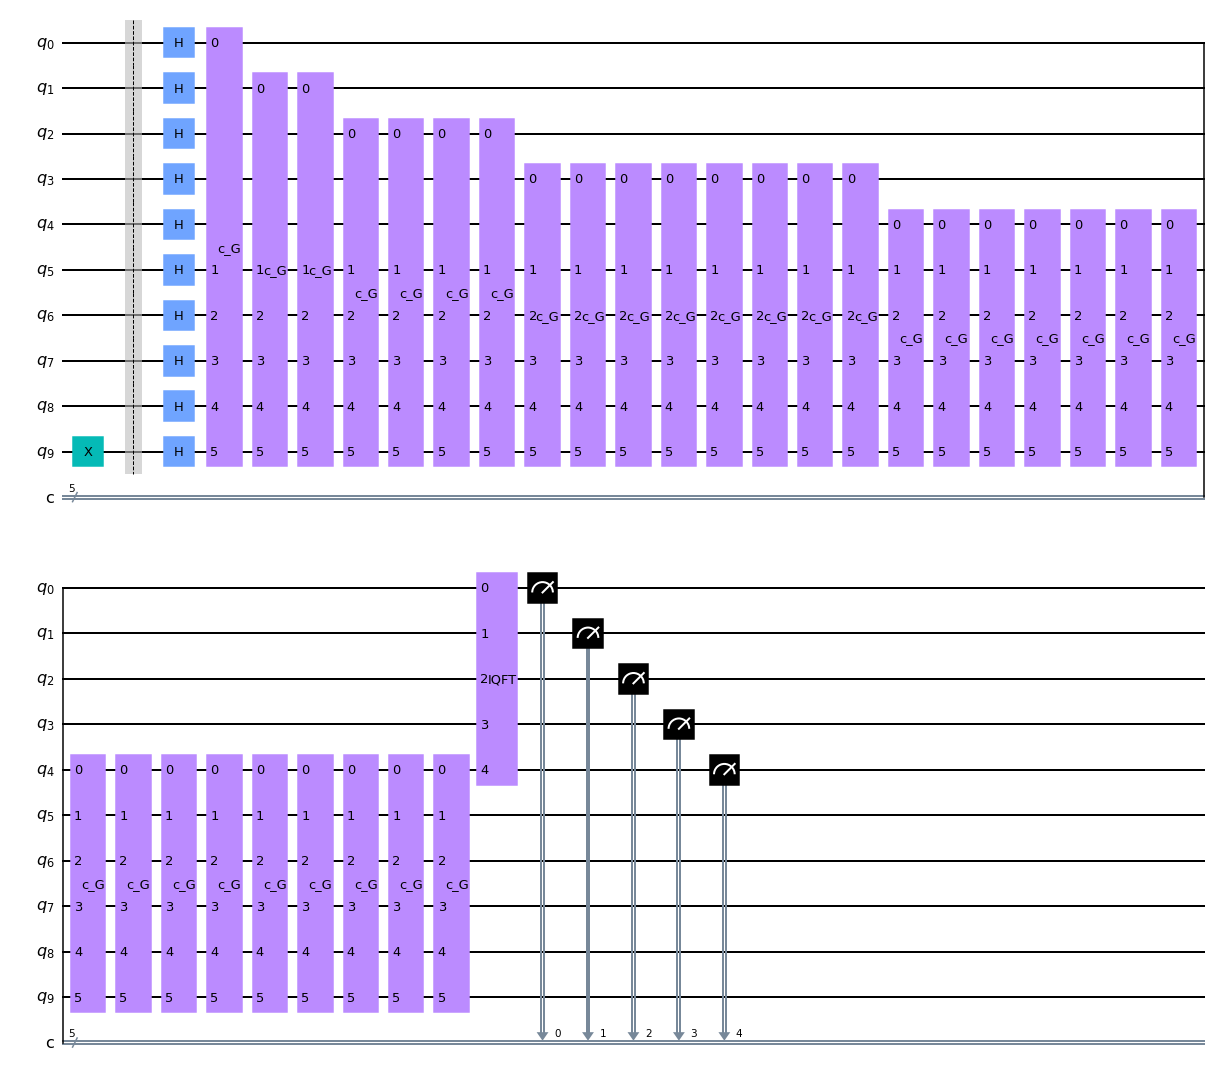

In [3]:
counting_n = 5
searching_n = counting_n
tn = counting_n + searching_n
    
qc = QuantumCircuit(tn, counting_n)

# initialize the last wire to the eigenvector of U
qc.x(tn-1)
qc.barrier()
    
# Setting the counting and searching qubits to superposition states
for i in range(tn):
    qc.h(i)
    
# Making the grover oracel into a controlled oracle 
con_grover = grover_oracle(counting_n).control(1)
    
# Applying the grover oracel onto the searching qubits using the counting qubits
iterations= 1
for x in range(counting_n):
    for i in range(iterations):
        qc.append(con_grover , [x] + [*range(counting_n, tn)] ) # [x] is control and [5,6,7..tn] are target qubits
    iterations =  2*iterations
    
# appling Inverse QFT
qc.append(QFT(counting_n).inverse(), range(counting_n))
    
# measuring the counting qubits
for i in range(counting_n):
    qc.measure(i,i)
    
qc.draw('mpl')

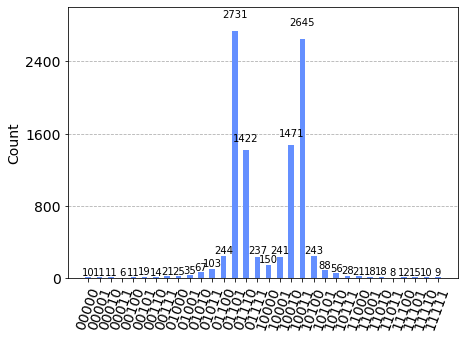

In [4]:
# Simulating the Quantum COunting Circuit
simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator, shots=10000).result().get_counts()
plot_histogram(counts)

In [5]:
# Identifying the state with maximum output
highest_probability_outcome = max(counts, key = counts.get)

print(highest_probability_outcome)

01101


In [6]:
# Calculating the angle encoded in the counting qubtis

theta = int(highest_probability_outcome, 2)*(pi*2)/(2**counting_n)

N = 2**(searching_n-1)
M = N* (np.sin(theta/2)**2)

# Calculating the number of solutions along with error
solutions = N-M
print("Using =", counting_n, ", \nNumber of solutions = ", solutions)
m = counting_n-1
err = (np.sqrt(2*M*N) + N/(2**(counting_n)))*(2**(-m))

print("With error=", err)

Using = 5 , 
Number of solutions =  1.3482431015796355
With error= 1.3845680011743529
